# Problem Statement
- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

# Business Goal
- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


## Reading and Understanding data

In [2]:
# Reading the data
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of data
leads_df.shape

(9240, 37)

In [4]:
# For the see all columns and rows we can import pandas options
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.set_option('display.html.border',1)

In [5]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Describe the data
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking info of our data
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  Specialization                                 o

## Checking the Null values

In [8]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the persantage of the null values
(leads_df.isnull().sum()*100).sort_values(ascending=False)

Lead Quality                                     476700
Asymmetrique Profile Score                       421800
Asymmetrique Activity Score                      421800
Asymmetrique Profile Index                       421800
Asymmetrique Activity Index                      421800
Tags                                             335300
What matters most to you in choosing a course    270900
Lead Profile                                     270900
What is your current occupation                  269000
Country                                          246100
How did you hear about X Education               220700
Specialization                                   143800
City                                             142000
TotalVisits                                       13700
Page Views Per Visit                              13700
Last Activity                                     10300
Lead Source                                        3600
Do Not Email                                    

## Cheking the Duplicates

In [10]:
# Cheking the duplicates and Droping it.
leads_df1 = leads_df.copy()
leads_df1.drop_duplicates(subset = None ,inplace = True)

In [11]:
leads_df.shape

(9240, 37)

In [12]:
leads_df1.shape

(9240, 37)

- so here we can see that there is no duplicate value in our data.

## Data Cleaning

In [13]:
new_var = (leads_df1.isnull().sum()/leads_df1.shape[0])*100
list(new_var[new_var>30].index)

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [14]:
# Droping the columns which has morethan 30% null values
leads_df1 = leads_df1.drop(list(new_var[new_var>30].index),axis = 1)


In [15]:
leads_df1.shape

(9240, 31)

In [16]:
(leads_df1.isnull().sum()/leads_df1.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
for column in leads_df1:
    print(leads_df1[column].astype('category').value_counts())
    print('---------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------

In [18]:
leads_df1['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
leads_df1['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
leads_df1['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value Select which is of no use to the analysis so we drop them.

In [21]:
leads_df1.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

In [22]:
leads_df1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
leads_df1.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [24]:
# Again checking null values
leads_df1.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Country                                     2461
Specialization                              1438
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendati

In [25]:
# As we can see that , now we have to drop these columns as they won't help with our analysis.
leads_df1.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content','Country','City',
            'I agree to pay the amount through cheque'],axis=1,inplace=True)
leads_df1.shape

(9240, 14)

In [26]:
leads_df1.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
# Replacing Select with NaN
leads_df1['Specialization'] = leads_df1['Specialization'].replace('Select',np.nan)

In [28]:
leads_df1 = leads_df1[~pd.isnull(leads_df1['Lead Source'])]

In [29]:
leads_df1.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              101
Specialization                            3352
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
leads_df1 = leads_df1[~pd.isnull(leads_df1['TotalVisits'])]

In [31]:
leads_df1.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            3282
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
leads_df1 = leads_df1[~pd.isnull(leads_df1['Specialization'])]

In [33]:
leads_df1.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1257
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [34]:
leads_df1 = leads_df1[~pd.isnull(leads_df1['What is your current occupation'])]

In [35]:
leads_df1.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [36]:
print(len(leads_df1.index))
print(len(leads_df1.index)/9240)

4535
0.4908008658008658


#### Here we can see that variable `Prospect ID` won't be any use so we can drop this.

In [37]:
leads_df1.drop('Prospect ID',1,inplace=True)

In [38]:
leads_df1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,660673,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


## Exploratory data analysis - univeriate analysis for categorical variables

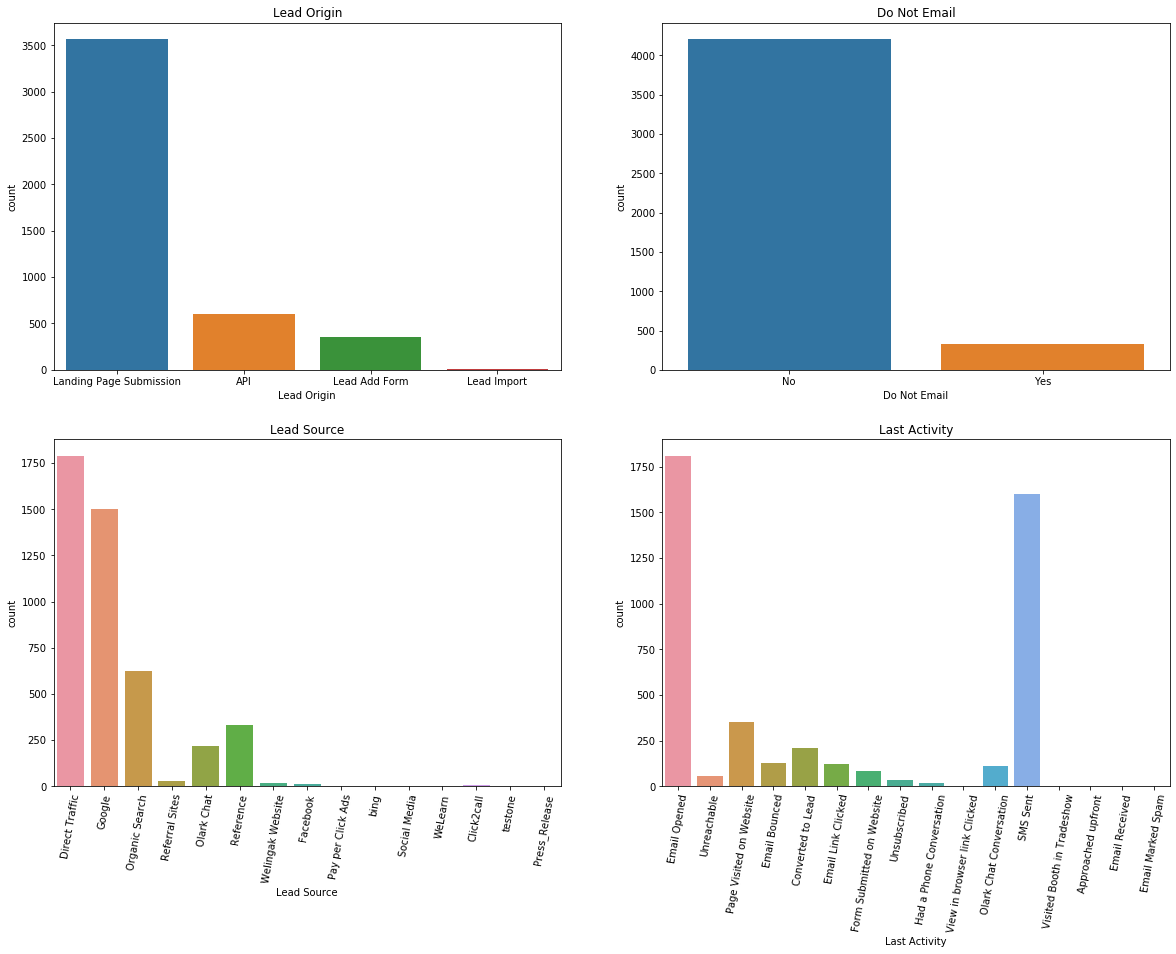

In [39]:
plt.figure(figsize=(20,60))

plt.subplot(8,2,1)
sns.countplot(leads_df1['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(leads_df1['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(8,2,3)
sns.countplot(leads_df1['Lead Source']).tick_params(axis='x',rotation = 80)
plt.title('Lead Source')

plt.subplot(8,2,4)
sns.countplot(leads_df1['Last Activity']).tick_params(axis='x',rotation = 80)
plt.title('Last Activity')

plt.show()

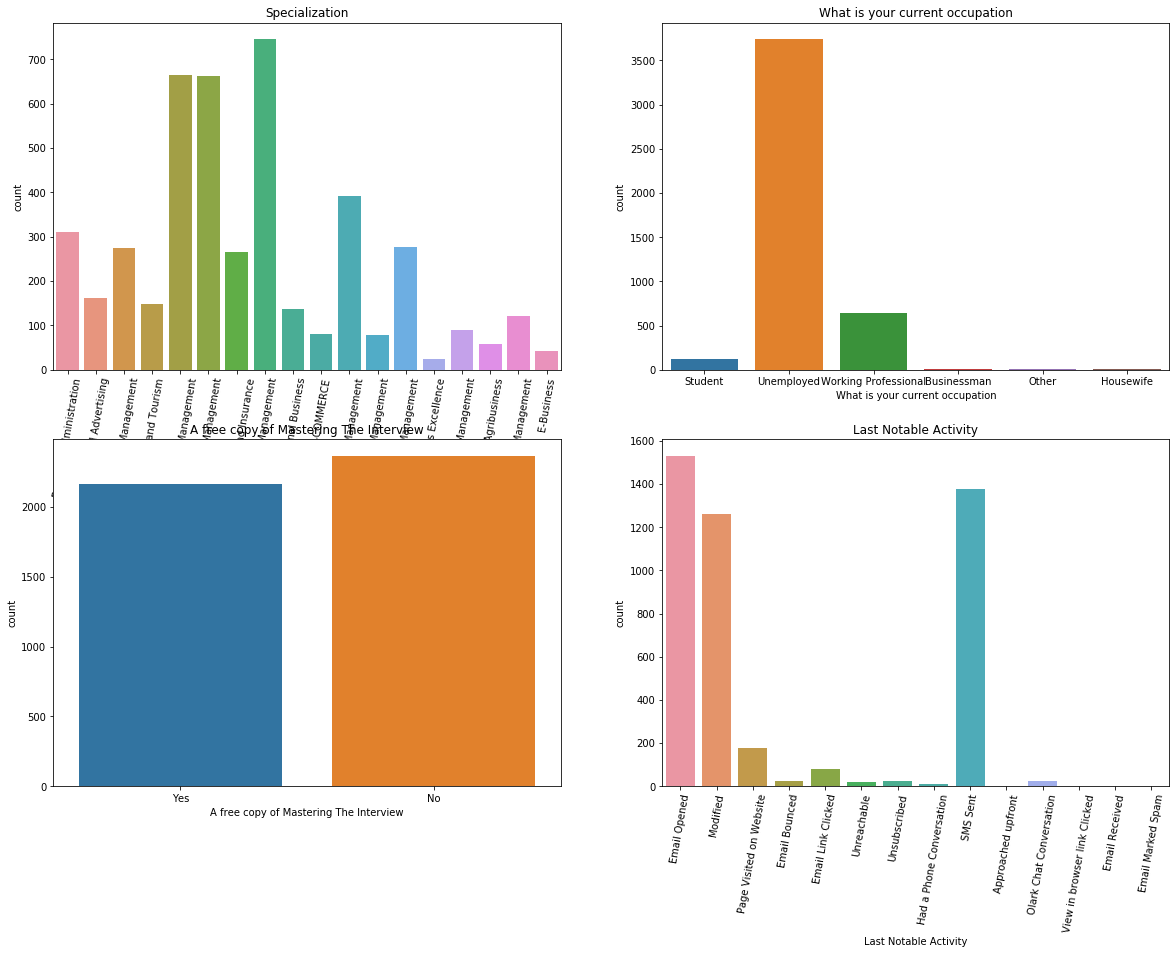

In [40]:
plt.figure(figsize=(20,60))

plt.subplot(8,2,1)
sns.countplot(leads_df1['Specialization']).tick_params(axis='x',rotation = 80)
plt.title('Specialization')

plt.subplot(8,2,2)
sns.countplot(leads_df1['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(8,2,3)
sns.countplot(leads_df1['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(8,2,4)
sns.countplot(leads_df1['Last Notable Activity']).tick_params(axis='x',rotation = 80)
plt.title('Last Notable Activity')

plt.show()

## Univeriate analysis for numeric variables

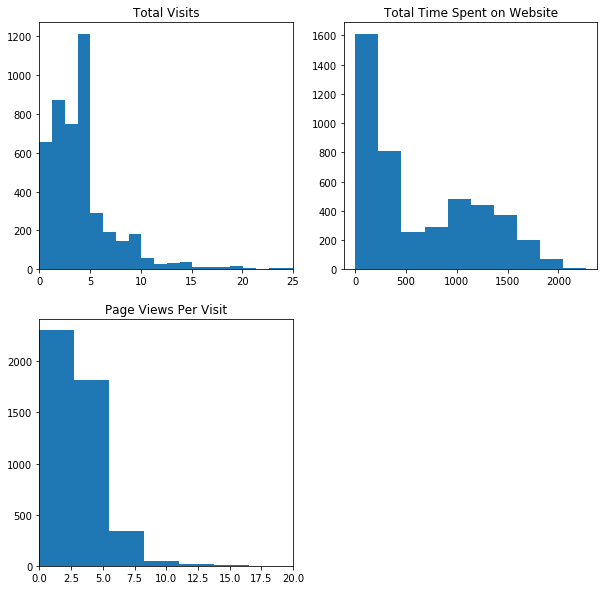

In [41]:
# ploting histogram for numerical variables
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(leads_df1['TotalVisits'],bins=200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads_df1['Total Time Spent on Website'],bins=10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads_df1['Page Views Per Visit'],bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)


plt.show()

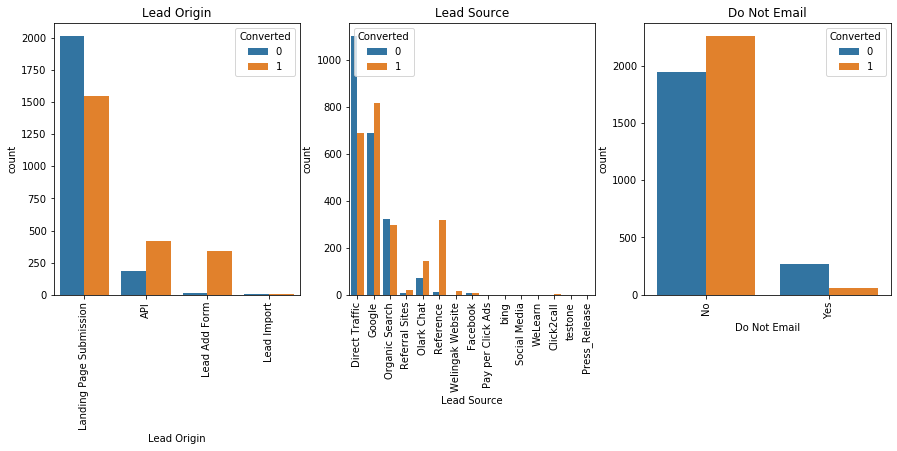

In [42]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,3,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(1,3,3)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.show()

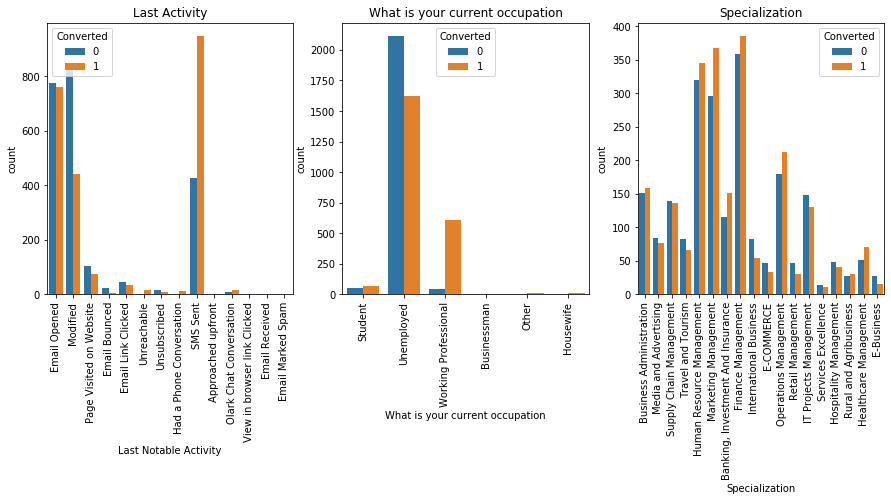

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,3,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(1,3,3)
sns.countplot(x='Specialization', hue='Converted', data= leads_df1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

### Now checking the correlation of numeric values using heatmap

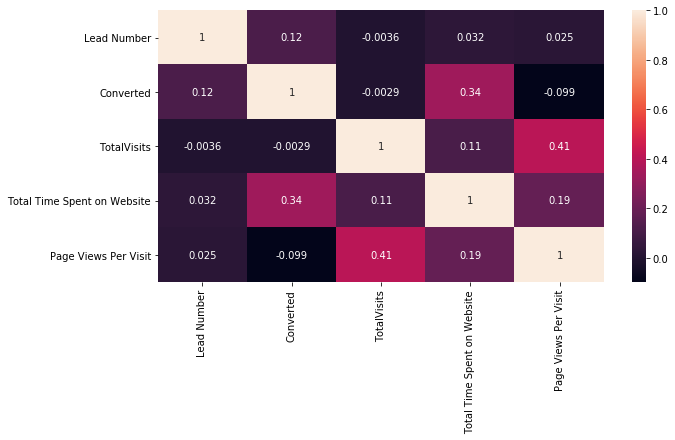

In [44]:
plt.figure(figsize=(10,5))
sns.heatmap(leads_df1.corr(),annot=True)
plt.show()

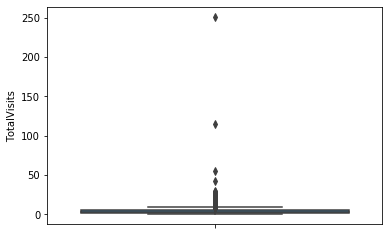

In [45]:
#visualizing spread of 'Totalvisits' variable
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df1['TotalVisits'])
plt.show()

- so here we can see that outliers are present. 

In [46]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_df1['TotalVisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    4535.000000
mean        4.293716
std         5.451975
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [47]:
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4535 entries, 2 to 9239
Data columns (total 13 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   Lead Number                             int64  
 1   Lead Origin                             object 
 2   Lead Source                             object 
 3   Do Not Email                            object 
 4   Converted                               int64  
 5   TotalVisits                             float64
 6   Total Time Spent on Website             int64  
 7   Page Views Per Visit                    float64
 8   Last Activity                           object 
 9   Specialization                          object 
 10  What is your current occupation         object 
 11  A free copy of Mastering The Interview  object 
 12  Last Notable Activity                   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 656.0+ KB


In [48]:
#Checking the percentage of the Data that has Converted Values = 1:

Converted = (sum(leads_df1['Converted'])/len(leads_df1['Converted'].index))*100
Converted

51.06945975744212

#### Removing the outliers

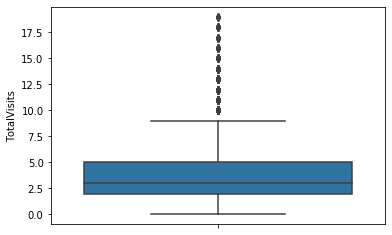

In [49]:
Q3 = leads_df1.TotalVisits.quantile(0.99)
leads_df1 = leads_df1[(leads_df1.TotalVisits <= Q3)]
Q1 = leads_df1.TotalVisits.quantile(0.01)
leads_df1 = leads_df1[(leads_df1.TotalVisits >= Q1)]
sns.boxplot(y=leads_df1['TotalVisits'])
plt.show()


#### Dummy variables

In [50]:
check_cols = leads_df1.select_dtypes(include = ['object']).columns
check_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [51]:
dummy_var = pd.get_dummies(leads_df1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization',
                                      'What is your current occupation', 'A free copy of Mastering The Interview',
                                      'Last Notable Activity']], drop_first=True)
leads_df1 = pd.concat([leads_df1,dummy_var],axis=1)

In [52]:
# now dropping the original columns.
leads_df1.drop(check_cols,1,inplace = True)

In [53]:
leads_df1.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,660727,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,660673,1,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,660608,1,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
11,660570,1,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Test - Train split and Scaling

In [54]:
A = leads_df1.drop(['Converted','Lead Number'], axis=1)
A.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10,8.0,1351,8.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
11,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
B = leads_df1['Converted']
B.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

#### Now convering dataset into 30% test and 70%train.

In [56]:
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.3,train_size=0.7,random_state=100)

In [57]:
# Now scaling
scaler = MinMaxScaler()

A_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(A_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
A_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6906,0.210526,0.673415,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8728,0.105263,0.448504,0.133333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2293,0.473684,0.097271,0.200000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1578,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4970,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


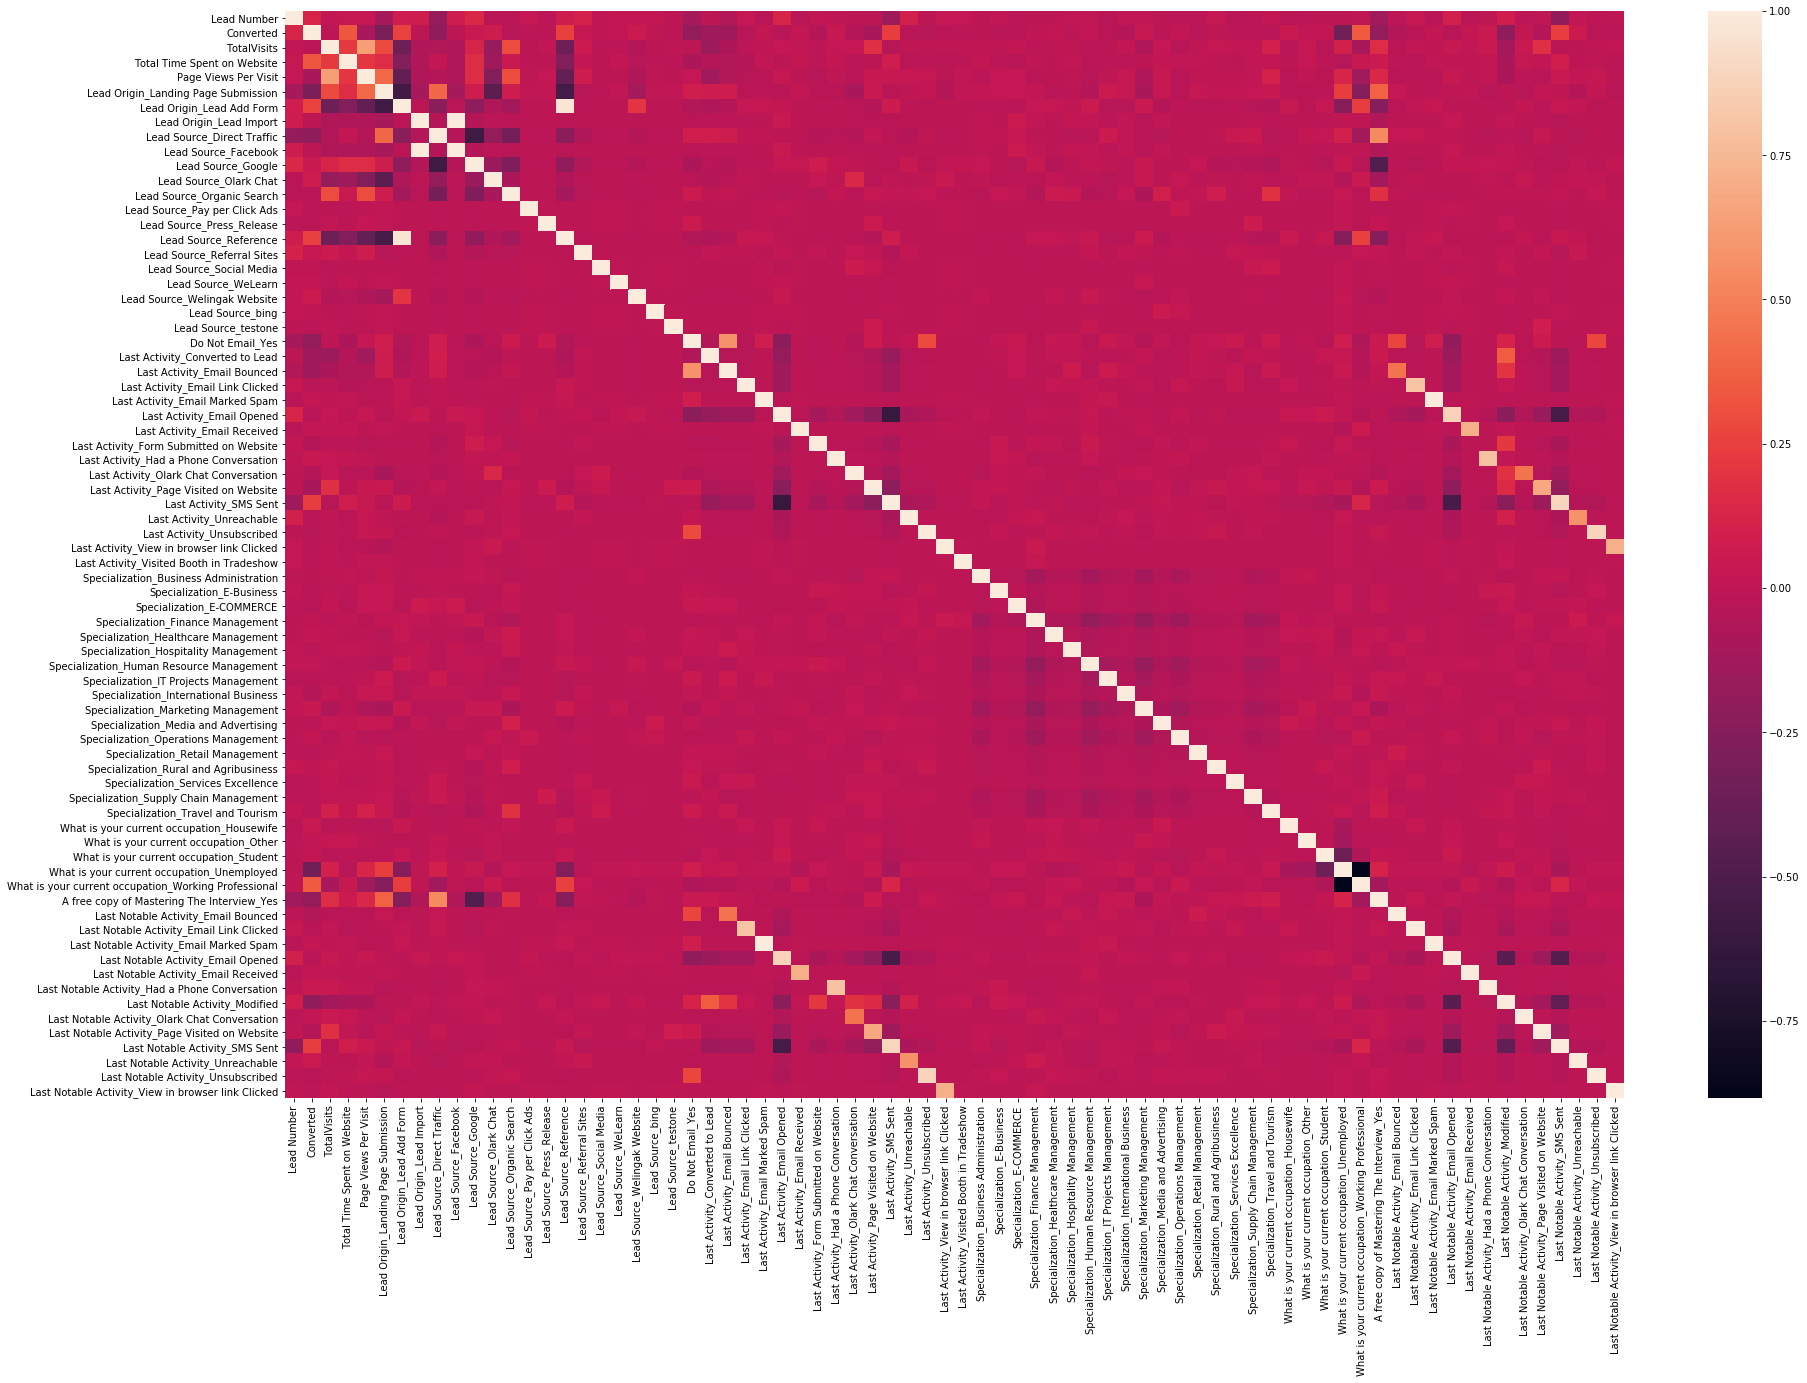

In [58]:
# Checking the correlation.
plt.figure(figsize=(30,20))
sns.heatmap(leads_df1.corr())
plt.show()

## Model building

In [59]:
# creating logistic regression object
logi_regr = LogisticRegression()

In [60]:
# Import RFE and select 15 variables
rfe = RFE(logi_regr, 15)
rfe = rfe.fit(A_train, B_train)

In [61]:
# Let's check which features have been selected by RFE

list(zip(A_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 26),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Social Media', False, 21),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_testone', False, 23),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email M

In [62]:
A_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Last Activity_Converted to Lead', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [63]:
# Putting all the columns selected by RFE in the variable 'colm'

colm = A_train.columns[rfe.support_]

In [64]:
# now Selecting only the columns selected by RFE

A_train = A_train[colm]

In [65]:
# Fitting a logistic Regression model on A_train after adding a constant and output the summary

A_train_sm = sm.add_constant(A_train)
logm2 = sm.GLM(B_train, A_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3128
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.5
Date:                Sat, 05 Dec 2020   Deviance:                       2771.0
Time:                        14:57:39   Pearson chi2:                 3.33e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8524      0.151     -5.633      0.000      -1.149      -0.556
TotalVisits                                              1.5429      0.381      4.049      0.000       0.796       2.290
Total Time Spent on Website                              4.2671      0.212     20.175      0.000       3.853       4.682
Page Views Per Visit                                    -1.4786      0.485     -3.051      0.002      -2.428      -0.529
Lead Origin_Landing Page Submission                     -1.1986      0.143     -8.355      0.000      -1.480      -0.917
Lead Origin_Lead Add Form                                1.6600      1.197      1.387      0.165      -0.686       4.005
Lead Source_Reference                                    1.5716      1.238      1.269      0.204      -0.855       3.999
Lead Source_Welingak Website                            22.1577   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
Do Not Email_Yes                                        -1.8802      0.244     -7.698      0.000      -2.359      -1.401
Last Activity_Converted to Lead                         -1.1256      0.278     -4.045      0.000      -1.671      -0.580
Last Activity_SMS Sent                                   1.1393      0.101     11.253      0.000       0.941       1.338
Last Activity_Unsubscribed                               1.7026      0.562      3.030      0.002       0.601       2.804
What is your current occupation_Housewife               23.4864   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
What is your current occupation_Working Professional     2.5547      0.208     12.300      0.000       2.148       2.962
Last Notable Activity_Had a Phone Conversation          23.4581   2.34e+04      0.001      0.999   -4.58e+04    4.59e+04
Last Notable Activity_Unreachable                        2.8279      1.122      2.520      0.012       0.628       5.027
========================================================================================================================
"""

In [66]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,64.52
5,Lead Source_Reference,61.70
2,Page Views Per Visit,5.91
0,TotalVisits,4.62
3,Lead Origin_Landing Page Submission,4.29
6,Lead Source_Welingak Website,4.00
1,Total Time Spent on Website,2.33
9,Last Activity_SMS Sent,1.63
12,What is your current occupation_Working Professional,1.27
7,Do Not Email_Yes,1.20


In [67]:
# dropping 'What is your current occupation_housewife' since it has the p value greater than 0.05
A_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [68]:
logm1 = sm.GLM(B_train,(sm.add_constant(A_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3129
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1389.2
Date:                Sat, 05 Dec 2020   Deviance:                       2778.5
Time:                        14:57:40   Pearson chi2:                 3.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8431      0.151     -5.579      0.000      -1.139      -0.547
TotalVisits                                              1.5329      0.381      4.026      0.000       0.787       2.279
Total Time Spent on Website                              4.2651      0.211     20.197      0.000       3.851       4.679
Page Views Per Visit                                    -1.4956      0.484     -3.088      0.002      -2.445      -0.546
Lead Origin_Landing Page Submission                     -1.1925      0.143     -8.326      0.000      -1.473      -0.912
Lead Origin_Lead Add Form                                1.6511      1.197      1.380      0.168      -0.694       3.996
Lead Source_Reference                                    1.6028      1.238      1.295      0.195      -0.824       4.029
Lead Source_Welingak Website                            22.1587   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
Do Not Email_Yes                                        -1.8843      0.244     -7.718      0.000      -2.363      -1.406
Last Activity_Converted to Lead                         -1.1352      0.278     -4.082      0.000      -1.680      -0.590
Last Activity_SMS Sent                                   1.1313      0.101     11.187      0.000       0.933       1.330
Last Activity_Unsubscribed                               1.6989      0.562      3.024      0.002       0.598       2.800
What is your current occupation_Working Professional     2.5494      0.208     12.277      0.000       2.142       2.956
Last Notable Activity_Had a Phone Conversation          23.4511   2.34e+04      0.001      0.999   -4.59e+04    4.59e+04
Last Notable Activity_Unreachable                        2.8182      1.122      2.511      0.012       0.619       5.018
========================================================================================================================
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,64.52
5,Lead Source_Reference,61.69
2,Page Views Per Visit,5.91
0,TotalVisits,4.62
3,Lead Origin_Landing Page Submission,4.29
6,Lead Source_Welingak Website,4.00
1,Total Time Spent on Website,2.33
9,Last Activity_SMS Sent,1.63
11,What is your current occupation_Working Professional,1.27
7,Do Not Email_Yes,1.20


In [70]:
# droping 'Specialization_e-business' 
A_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [71]:
logm1 = sm.GLM(B_train,(sm.add_constant(A_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3130
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1390.6
Date:                Sat, 05 Dec 2020   Deviance:                       2781.1
Time:                        14:57:41   Pearson chi2:                 3.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8434      0.151     -5.580      0.000      -1.140      -0.547
TotalVisits                                              1.5336      0.381      4.028      0.000       0.787       2.280
Total Time Spent on Website                              4.2652      0.211     20.197      0.000       3.851       4.679
Page Views Per Visit                                    -1.4967      0.484     -3.091      0.002      -2.446      -0.548
Lead Origin_Landing Page Submission                     -1.1925      0.143     -8.326      0.000      -1.473      -0.912
Lead Origin_Lead Add Form                                3.1292      1.054      2.970      0.003       1.064       5.194
Lead Source_Reference                                    0.1248      1.100      0.113      0.910      -2.032       2.282
Do Not Email_Yes                                        -1.8845      0.244     -7.718      0.000      -2.363      -1.406
Last Activity_Converted to Lead                         -1.1348      0.278     -4.081      0.000      -1.680      -0.590
Last Activity_SMS Sent                                   1.1323      0.101     11.200      0.000       0.934       1.330
Last Activity_Unsubscribed                               1.6995      0.562      3.024      0.002       0.598       2.801
What is your current occupation_Working Professional     2.5494      0.208     12.277      0.000       2.142       2.956
Last Notable Activity_Had a Phone Conversation          22.4514   1.42e+04      0.002      0.999   -2.78e+04    2.79e+04
Last Notable Activity_Unreachable                        2.8186      1.122      2.512      0.012       0.619       5.018
========================================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Reference,16.28
4,Lead Origin_Lead Add Form,16.15
2,Page Views Per Visit,5.91
0,TotalVisits,4.62
3,Lead Origin_Landing Page Submission,4.29
1,Total Time Spent on Website,2.33
8,Last Activity_SMS Sent,1.63
10,What is your current occupation_Working Professional,1.27
6,Do Not Email_Yes,1.20
9,Last Activity_Unsubscribed,1.11


In [73]:
# droping 'Last Notable Activity_Had a Phone Conversation' 
A_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [74]:
logm1 = sm.GLM(B_train,(sm.add_constant(A_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3131
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1395.1
Date:                Sat, 05 Dec 2020   Deviance:                       2790.1
Time:                        14:57:41   Pearson chi2:                 3.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8323      0.151     -5.521      0.000      -1.128      -0.537
TotalVisits                                              1.6161      0.376      4.294      0.000       0.878       2.354
Total Time Spent on Website                              4.2523      0.211     20.183      0.000       3.839       4.665
Page Views Per Visit                                    -1.5470      0.483     -3.204      0.001      -2.493      -0.601
Lead Origin_Landing Page Submission                     -1.1998      0.143     -8.398      0.000      -1.480      -0.920
Lead Origin_Lead Add Form                                3.1189      1.053      2.961      0.003       1.054       5.184
Lead Source_Reference                                    0.1261      1.100      0.115      0.909      -2.031       2.283
Do Not Email_Yes                                        -1.8893      0.244     -7.741      0.000      -2.368      -1.411
Last Activity_Converted to Lead                         -1.1368      0.278     -4.091      0.000      -1.681      -0.592
Last Activity_SMS Sent                                   1.1246      0.101     11.135      0.000       0.927       1.323
Last Activity_Unsubscribed                               1.6969      0.561      3.022      0.003       0.596       2.797
What is your current occupation_Working Professional     2.5433      0.208     12.250      0.000       2.136       2.950
Last Notable Activity_Unreachable                        2.8120      1.122      2.506      0.012       0.613       5.011
========================================================================================================================
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Reference,16.28
4,Lead Origin_Lead Add Form,16.15
2,Page Views Per Visit,5.90
0,TotalVisits,4.59
3,Lead Origin_Landing Page Submission,4.28
1,Total Time Spent on Website,2.33
8,Last Activity_SMS Sent,1.63
10,What is your current occupation_Working Professional,1.27
6,Do Not Email_Yes,1.20
9,Last Activity_Unsubscribed,1.11


In [76]:
# droping 'Lead Source_Reference' 
A_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [77]:
logm1 = sm.GLM(B_train,(sm.add_constant(A_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3132
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1395.1
Date:                Sat, 05 Dec 2020   Deviance:                       2790.2
Time:                        14:57:42   Pearson chi2:                 3.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8324      0.151     -5.521      0.000      -1.128      -0.537
TotalVisits                                              1.6161      0.376      4.294      0.000       0.878       2.354
Total Time Spent on Website                              4.2522      0.211     20.183      0.000       3.839       4.665
Page Views Per Visit                                    -1.5471      0.483     -3.204      0.001      -2.493      -0.601
Lead Origin_Landing Page Submission                     -1.1997      0.143     -8.398      0.000      -1.480      -0.920
Lead Origin_Lead Add Form                                3.2329      0.362      8.937      0.000       2.524       3.942
Do Not Email_Yes                                        -1.8889      0.244     -7.741      0.000      -2.367      -1.411
Last Activity_Converted to Lead                         -1.1368      0.278     -4.091      0.000      -1.681      -0.592
Last Activity_SMS Sent                                   1.1247      0.101     11.136      0.000       0.927       1.323
Last Activity_Unsubscribed                               1.6965      0.561      3.022      0.003       0.596       2.797
What is your current occupation_Working Professional     2.5435      0.208     12.252      0.000       2.137       2.950
Last Notable Activity_Unreachable                        2.8122      1.122      2.507      0.012       0.613       5.011
========================================================================================================================
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.90
0,TotalVisits,4.59
3,Lead Origin_Landing Page Submission,4.28
1,Total Time Spent on Website,2.32
7,Last Activity_SMS Sent,1.63
9,What is your current occupation_Working Professional,1.26
5,Do Not Email_Yes,1.20
4,Lead Origin_Lead Add Form,1.15
8,Last Activity_Unsubscribed,1.11
6,Last Activity_Converted to Lead,1.09


In [79]:
# droping 'Page Views Per Visit
A_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [80]:
logm1 = sm.GLM(B_train,(sm.add_constant(A_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3133
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.2
Date:                Sat, 05 Dec 2020   Deviance:                       2800.5
Time:                        14:57:44   Pearson chi2:                 3.38e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9124      0.149     -6.123      0.000      -1.204      -0.620
TotalVisits                                              0.9760      0.315      3.100      0.002       0.359       1.593
Total Time Spent on Website                              4.2236      0.210     20.131      0.000       3.812       4.635
Lead Origin_Landing Page Submission                     -1.2972      0.140     -9.249      0.000      -1.572      -1.022
Lead Origin_Lead Add Form                                3.3143      0.361      9.181      0.000       2.607       4.022
Do Not Email_Yes                                        -1.8769      0.243     -7.709      0.000      -2.354      -1.400
Last Activity_Converted to Lead                         -1.0981      0.278     -3.952      0.000      -1.643      -0.554
Last Activity_SMS Sent                                   1.0969      0.100     10.941      0.000       0.900       1.293
Last Activity_Unsubscribed                               1.6259      0.560      2.905      0.004       0.529       2.723
What is your current occupation_Working Professional     2.5543      0.208     12.310      0.000       2.148       2.961
Last Notable Activity_Unreachable                        2.7946      1.126      2.483      0.013       0.588       5.001
========================================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = A_train.columns
vif['VIF'] = [variance_inflation_factor(A_train.values, i) for i in range(A_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.52
0,TotalVisits,2.95
1,Total Time Spent on Website,2.31
6,Last Activity_SMS Sent,1.61
8,What is your current occupation_Working Professional,1.26
4,Do Not Email_Yes,1.20
3,Lead Origin_Lead Add Form,1.15
7,Last Activity_Unsubscribed,1.11
5,Last Activity_Converted to Lead,1.09
9,Last Notable Activity_Unreachable,1.01


#### So, here we have all the VIF values less than 5 and all the p values in our model is also less than 0.05

## Model Evaluation

In [82]:
# Now we have both the P-Values and VIF are decent enough for all the variable.

B_train_prediction = res.predict(sm.add_constant(A_train_sm))
B_train_prediction[:10]

6906    0.889882
8728    0.724599
2293    0.231339
1578    0.997701
4970    0.455627
4018    0.844713
8113    0.997701
8235    0.049304
2551    0.218343
6901    0.180641
dtype: float64

In [83]:
# reshaping 
B_train_prediction = B_train_prediction.values.reshape(-1)
B_train_prediction[:10]

array([0.88988169, 0.7245989 , 0.23133913, 0.99770121, 0.45562681,
       0.84471338, 0.99770121, 0.04930416, 0.21834294, 0.18064133])

In [84]:
# Creating a new  Data frame with given convertion rate and probablity of predicted ones

B_train_prediction_final = pd.DataFrame({'Converted':B_train.values, 'Conversion_Prob':B_train_prediction})
B_train_prediction_final['LeadID'] = B_train.index
B_train_prediction_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.889882,6906
1,1,0.724599,8728
2,0,0.231339,2293
3,1,0.997701,1578
4,0,0.455627,4970


In [85]:
# Substituting 0 or 1 with the cut off as 0.5
B_train_prediction_final['Predicted'] = B_train_prediction_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
B_train_prediction_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.889882,6906,1
1,1,0.724599,8728,1
2,0,0.231339,2293,0
3,1,0.997701,1578,1
4,0,0.455627,4970,0


In [86]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(B_train_prediction_final.Converted, B_train_prediction_final.Predicted )
print(confusion)

[[1237  272]
 [ 357 1278]]


In [87]:
# Checking the overall accuracy
metrics.accuracy_score(B_train_prediction_final.Converted, B_train_prediction_final.Predicted)

0.7999363867684478

In [88]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [89]:
# Calculating the sensitivity

TP/(TP+FN)

0.781651376146789

In [90]:
# Calculating the specificity

TN/(TN+FP)

0.8197481776010603

### Plotting ROC curve

In [91]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( B_train_prediction_final.Converted, B_train_prediction_final.Conversion_Prob, drop_intermediate = False )

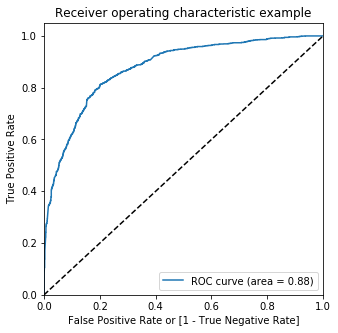

In [93]:
draw_roc(B_train_prediction_final.Converted, B_train_prediction_final.Conversion_Prob)

### Optimal Cutt-off

In [94]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    B_train_prediction_final[i]= B_train_prediction_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
B_train_prediction_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.889882,6906,1,1,1,1,1,1,1,1,1,1,0
1,1,0.724599,8728,1,1,1,1,1,1,1,1,1,0,0
2,0,0.231339,2293,0,1,1,1,0,0,0,0,0,0,0
3,1,0.997701,1578,1,1,1,1,1,1,1,1,1,1,1
4,0,0.455627,4970,0,1,1,1,1,1,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(B_train_prediction_final.Converted, B_train_prediction_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.520038,1.000000,0.000000
0.1,0.1,0.586832,0.992049,0.147780
0.2,0.2,0.728372,0.951682,0.486415
0.3,0.3,0.769402,0.908257,0.618953
0.4,0.4,0.796438,0.848930,0.739563
0.5,0.5,0.799936,0.781651,0.819748
0.6,0.6,0.780216,0.704587,0.862160
0.7,0.7,0.754453,0.621407,0.898608
0.8,0.8,0.720102,0.513150,0.944334
0.9,0.9,0.657125,0.361468,0.977469


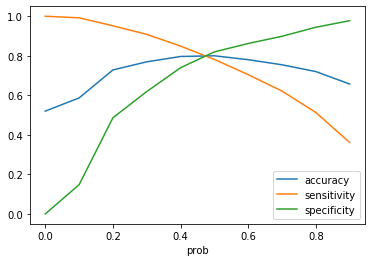

In [96]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [97]:
B_train_prediction_final['final_predicted'] = B_train_prediction_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)
B_train_prediction_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.889882,6906,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.724599,8728,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.231339,2293,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.997701,1578,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.455627,4970,0,1,1,1,1,1,0,0,0,0,0,0


In [98]:
#checking overall accuracy
metrics.accuracy_score(B_train_prediction_final.Converted, B_train_prediction_final.final_predicted)

0.7999363867684478

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(B_train_prediction_final.Converted, B_train_prediction_final.final_predicted )
confusion2

array([[1237,  272],
       [ 357, 1278]], dtype=int64)

In [100]:
#true positive
TP = confusion2[1,1]
#true negatives
TN = confusion2[0,0]
#  false positives
FP = confusion2[0,1] 
#  false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.781651376146789

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.8197481776010603

## Now Making Prediction

In [103]:
# Scale the test set as well using just 'transform'
A_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.transform(A_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [104]:
# Selecting the columns in A_train for A_test as well

A_test = A_test[colm]
A_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8350,0.157895,0.069982,0.200000,1,0,0,0,0,0,0,0,0,0,0,0
4238,0.157895,0.133803,0.200000,1,0,0,0,0,0,1,0,0,1,0,0
6784,0.105263,0.825704,0.133333,1,0,0,0,0,0,1,0,0,1,0,0
72,0.157895,0.048856,0.200000,1,0,0,0,1,0,0,0,0,0,0,0
8231,0.263158,0.013644,0.333333,1,0,0,0,0,0,1,0,0,0,0,0


In [105]:
# Adding a constant to A_test

A_test_sm = sm.add_constant(A_test[colm])

In [106]:
# Checking A_test_sm

A_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8350,1.0,0.157895,0.069982,0.200000,1,0,0,0,0,0,0,0,0,0,0,0
4238,1.0,0.157895,0.133803,0.200000,1,0,0,0,0,0,1,0,0,1,0,0
6784,1.0,0.105263,0.825704,0.133333,1,0,0,0,0,0,1,0,0,1,0,0
72,1.0,0.157895,0.048856,0.200000,1,0,0,0,1,0,0,0,0,0,0,0
8231,1.0,0.263158,0.013644,0.333333,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7566,1.0,0.210526,0.528169,0.266667,1,0,0,0,0,0,1,0,0,1,0,0
6319,1.0,0.263158,0.087148,0.333333,1,0,0,0,0,0,1,0,0,0,0,0
1563,1.0,0.000000,0.000000,0.000000,0,1,1,0,0,0,1,0,0,0,0,0
6015,1.0,0.052632,0.015845,0.066667,0,1,1,0,0,0,0,0,0,0,0,0


In [107]:
 # Drop the required columns from A_test as well

A_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [108]:
B_test_pred = res.predict(A_test_sm)
# Coverting it to df
B_pred_df = pd.DataFrame(B_test_pred)
# Converting y_test to dataframe
B_test_df = pd.DataFrame(B_test)
# Putting CustID to index
B_test_df['LeadID'] = B_test_df.index
# Remove index for both dataframes to append them side by side 
B_pred_df.reset_index(drop=True, inplace=True)
B_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
B_pred_final = pd.concat([B_test_df, B_pred_df],axis=1)
# Renaming column 
B_pred_final= B_pred_final.rename(columns = {0 : 'Conversion_Prob'})
B_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,8350,0.141309
1,1,4238,0.896767
2,1,6784,0.994128
3,0,72,0.022427
4,0,8231,0.280839


In [109]:
B_pred_final['final_predicted'] = B_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
B_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,8350,0.141309,0
1,1,4238,0.896767,1
2,1,6784,0.994128,1
3,0,72,0.022427,0
4,0,8231,0.280839,0


In [110]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(B_pred_final.Converted, B_pred_final.final_predicted)
accuracy_score

0.793026706231454

In [111]:
confusion_test = metrics.confusion_matrix(B_pred_final.Converted, B_pred_final.final_predicted )
print(confusion_test)

[[564 125]
 [154 505]]


In [112]:
#true positive
TP = confusion_test[1,1]
#true negatives
TN = confusion_test[0,0]
#  false positives
FP = confusion_test[0,1] 
#  false negatives
FN = confusion_test[1,0]

In [113]:
# Calculating the sensitivity
TP/(TP+FN)

0.7663125948406677

In [114]:
# Calculating the specificity
TN/(TN+FP)

0.818577648766328

In [115]:
# Calculating Precision
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8015873015873016

In [116]:
#calculating Recall
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7663125948406677

In [117]:
B_pred_final.Converted, B_pred_final.final_predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 1343    1
 1344    0
 1345    1
 1346    1
 1347    1
 Name: Converted, Length: 1348, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 1343    1
 1344    0
 1345    1
 1346    1
 1347    1
 Name: final_predicted, Length: 1348, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(B_pred_final.Converted, B_pred_final.Conversion_Prob)

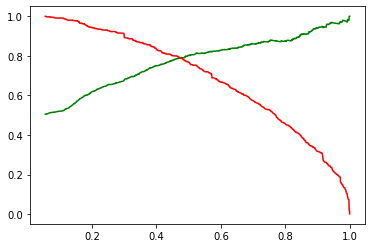

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
B_pred_final['final_predicted'] = B_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

B_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,8350,0.141309,0
1,1,4238,0.896767,1
2,1,6784,0.994128,1
3,0,72,0.022427,0
4,0,8231,0.280839,0


In [121]:
# Let's check the accuracy now

metrics.accuracy_score(B_pred_final.Converted, B_pred_final.final_predicted)

0.793026706231454

In [122]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(B_pred_final.Converted, B_pred_final.final_predicted )
confusion2

array([[564, 125],
       [154, 505]], dtype=int64)

In [123]:
# true positive
TP = confusion2[1,1]
# true negative
TN = confusion2[0,0]
# false positive
FP = confusion2[0,1]
# false negative
FN = confusion2[1,0]   

In [124]:
# Calculate Precision
TP/(TP+FP)

0.8015873015873016

In [125]:
# Calculate Recall
TP/(TP+FN)

0.7663125948406677

## Calculating Lead score

### Lead Score = 100 * ConversionProbability

In [126]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = B_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,8350,0.141309,0
1,1,4238,0.896767,1
2,1,6784,0.994128,1
3,0,72,0.022427,0
4,0,8231,0.280839,0


In [127]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = B_train_prediction_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.889882,6906,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.724599,8728,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.231339,2293,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.997701,1578,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.455627,4970,0,1,1,1,1,1,0,0,0,0,0,0


In [128]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6906,1,0.889882,1
1,8728,1,0.724599,1
2,2293,0,0.231339,0
3,1578,1,0.997701,1
4,4970,0,0.455627,0


In [129]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6906,1,0.889882,1
1,8728,1,0.724599,1
2,2293,0,0.231339,0
3,1578,1,0.997701,1
4,4970,0,0.455627,0


In [130]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(3144, 4)
(1348, 4)
(4492, 4)


In [131]:
len(lead_full_pred['LeadID'].unique().tolist())

4492

In [132]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,6906,1,0.889882,1,89
1,8728,1,0.724599,1,72
2,2293,0,0.231339,0,23
3,1578,1,0.997701,1,100
4,4970,0,0.455627,0,46


In [133]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [134]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
2,1,0.688173,1,69
3,0,0.183095,0,18
6,1,0.729962,1,73
10,1,0.586001,1,59
11,1,0.702206,1,70


In [135]:
# Slicing the Lead Number column from leads_data dataframe
leads_df1 = leads_df1[['Lead Number']]
leads_df1.head()

,Lead Number
2,660727
3,660719
6,660673
10,660608
11,660570


In [136]:
leads_df.shape

(9240, 37)

In [137]:
leads_df1.shape

(4492, 1)

In [138]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
leads_final_df = pd.concat([leads_df1, lead_full_pred], axis=1)
leads_final_df.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
2,660727,1,0.688173,1,69
3,660719,0,0.183095,0,18
6,660673,1,0.729962,1,73
10,660608,1,0.586001,1,59
11,660570,1,0.702206,1,70
12,660562,1,0.863556,1,86
13,660558,0,0.139611,0,14
14,660553,0,0.045427,0,5
18,660522,1,0.787653,1,79
20,660479,0,0.163728,0,16


In [139]:
# Inspecting the dataframe shape
leads_final_df.shape

(4492, 5)

In [140]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

TotalVisits                                             1.54
Total Time Spent on Website                             4.27
Page Views Per Visit                                   -1.48
Lead Origin_Landing Page Submission                    -1.20
Lead Origin_Lead Add Form                               1.66
Lead Source_Reference                                   1.57
Lead Source_Welingak Website                           22.16
Do Not Email_Yes                                       -1.88
Last Activity_Converted to Lead                        -1.13
Last Activity_SMS Sent                                  1.14
Last Activity_Unsubscribed                              1.70
What is your current occupation_Housewife              23.49
What is your current occupation_Working Professional    2.55
Last Notable Activity_Had a Phone Conversation         23.46
Last Notable Activity_Unreachable                       2.83
dtype: float64

In [141]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                              6.57
Total Time Spent on Website                             18.17
Page Views Per Visit                                    -6.30
Lead Origin_Landing Page Submission                     -5.10
Lead Origin_Lead Add Form                                7.07
Lead Source_Reference                                    6.69
Lead Source_Welingak Website                            94.34
Do Not Email_Yes                                        -8.01
Last Activity_Converted to Lead                         -4.79
Last Activity_SMS Sent                                   4.85
Last Activity_Unsubscribed                               7.25
What is your current occupation_Housewife              100.00
What is your current occupation_Working Professional    10.88
Last Notable Activity_Had a Phone Conversation          99.88
Last Notable Activity_Unreachable                       12.04
dtype: float64

In [142]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                              7
Total Time Spent on Website                              2
Page Views Per Visit                                     3
Lead Origin_Landing Page Submission                      8
Lead Origin_Lead Add Form                                9
Lead Source_Reference                                    0
Lead Source_Welingak Website                             5
Do Not Email_Yes                                         4
Last Activity_Converted to Lead                         10
Last Activity_SMS Sent                                  12
Last Activity_Unsubscribed                              14
What is your current occupation_Housewife                1
What is your current occupation_Working Professional     6
Last Notable Activity_Had a Phone Conversation          13
Last Notable Activity_Unreachable                       11
dtype: int64

In [143]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
11,What is your current occupation_Housewife,100.00
13,Last Notable Activity_Had a Phone Conversation,99.88
6,Lead Source_Welingak Website,94.34
